In [ ]:
!pip install adversarial-robustness-toolbox

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 17.3 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 0.13.0 requires scikit-learn>=1.2.2, but you have scikit-learn 1.1.3 which is incompatible.


In [ ]:
from sklearn.linear_model import LogisticRegression

import numpy as np
from matplotlib import pyplot as plt

from art.estimators.classification import SklearnClassifier
from art.attacks.evasion import ProjectedGradientDescent
from art.utils import load_mnist

import warnings
warnings.simplefilter('ignore')

In [ ]:
from keras.models import load_model
model = load_model('/content/cnn_20_epochs.h5')

Instructions for updating:
Colocations handled automatically by placer.


In [ ]:
# Importing required modules

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import LambdaCallback
import tensorflow.keras.layers as L
from tensorflow.keras.datasets import mnist, cifar10

import numpy as np
import matplotlib.pyplot as plt
from random import randint
from tqdm import tqdm

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [ ]:
# Scale the data
X_train = X_train / 255.0
X_test = X_test / 255.0

# Transform target variable into one-hotencoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
model.fit(X_train, y_train)

1563/1563 [==============================] - 428s 272ms/step - loss: 0.2934 - accuracy: 0.8986 - precision: 0.9240 - recall: 0.8768


In [ ]:
import tensorflow as tf

tf.compat.v1.disable_eager_execution()

In [ ]:
from art.estimators.classification import KerasClassifier
mean_cifar10 = np.mean(X_train, axis=(0, 1, 2))
std_cifar10 = np.std(X_train, axis=(0, 1, 2))
classifier = KerasClassifier(
    clip_values=(0, 255),
    model=model,
    preprocessing=(mean_cifar10, std_cifar10)
)

In [ ]:
pgd = ProjectedGradientDescent(estimator=classifier, norm=np.inf, eps=.1, eps_step=0.1, max_iter=1,
                               targeted=False, num_random_init=0, batch_size=1000)

In [ ]:
x_test_adv = pgd.generate(X_test)

PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
_, acc, *is_anything_else_being_returned = model.evaluate(x_test_adv, y_test, verbose=1)
print('> %.3f' % (acc * 100.0))

> 13.410


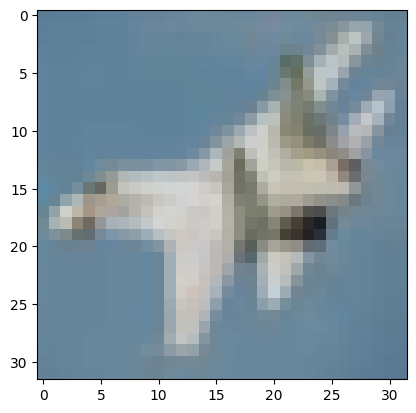

In [ ]:
plt.imshow(X_test[10])

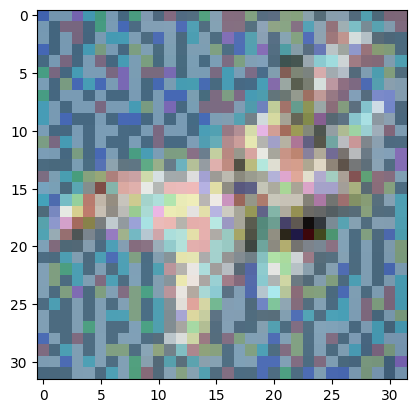

In [ ]:
plt.imshow(x_test_adv[10])